<a href="https://colab.research.google.com/github/AlexanderPiavis/GSB544/blob/main/Practice_Activity_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
X = df[['age', 'chol']]
y = df['diagnosis']

logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression())]
)

logistic_model_fitted = logistic_model.fit(X, y)

In [5]:
logistic_age_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][0]
logistic_chol_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][1]
logistic_intercept = logistic_model_fitted.named_steps['logistic'].intercept_

logistic_age_coef, logistic_chol_coef, logistic_intercept

(np.float64(0.42746115369956383),
 np.float64(0.09597542617159378),
 array([-0.27025982]))

y_hat = -0.27025982 + 0.42746115369956383(55) + 0.09597542617159378(Chol)

= 23.24010363+0.09597542617(Chol)
Chol = -242.2
The model will predict at risk of heart desease for everyone who is 55 years old. Even at very low levels of choloeteral.

logit(0.9) ~ 2.197
2.197 = −0.27025982+0.4274611537(55)+0.09597542617(Chol)
2.197 = 23.24010363+0.09597542617(Chol)
Chol = -219.3
A 55 year old already is at risk no matter the cholesteral level.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [7]:
X2 = df[['age', 'chol']]
y2 = df['diagnosis']

lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X2, y2)

In [8]:
lda_age_coef = lda_model_fitted.named_steps['lda'].coef_[0][0]
lda_chol_coef = lda_model_fitted.named_steps['lda'].coef_[0][1]
lda_intercept = lda_model_fitted.named_steps['lda'].intercept_

lda_age_coef, lda_chol_coef, lda_intercept

(np.float64(0.4344658185163842),
 np.float64(0.09493491278066943),
 array([-0.26973565]))

0 = -0.26973565 + 0.4344658185163842(Age) + 0.09493491278066943(Chol)


Chol ~ -249


A 55 year old would need a cholesteral level of -249 for the model to predict no heart diseas.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [9]:
from sklearn.svm import SVC
X = df[['age', 'chol']]
y = df['diagnosis']

param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)

svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5)
svc_pipeline_grid.fit(X, y)

svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]

svc_model_best

SVC(C=10, kernel='linear', probability=True)

In [10]:
svc_age_coef  = svc_model_best.coef_[0][0]
svc_chol_coef = svc_model_best.coef_[0][1]
svc_intercept = svc_model_best.intercept_[0]

svc_age_coef, svc_chol_coef, svc_intercept

(np.float64(0.6009556681731714),
 np.float64(0.19360163718551782),
 np.float64(-0.31134523984506396))

0 = -0.31134523984506396 + 0.6009556681731714(55) + 0.19360163718551782(Chol)

chol = -169.1

A 55 year old would need a cholesteral level of -169.1 for the model to predict no heart diseas.

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

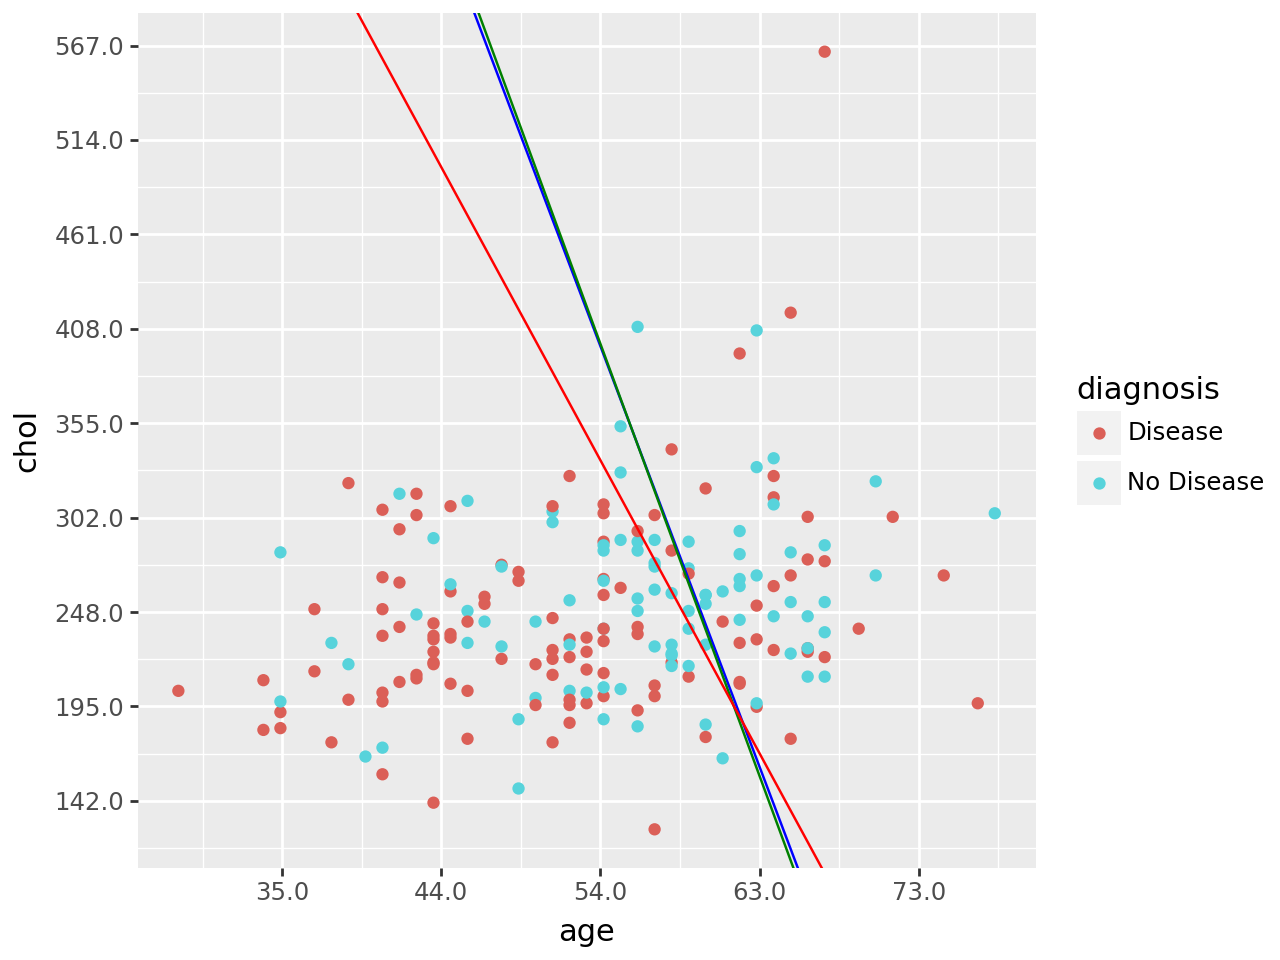

In [18]:
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "blue")
+ geom_abline(intercept = - lda_intercept / lda_chol_coef, slope = - lda_age_coef / lda_chol_coef, color = "green")
+ geom_abline(intercept = - svc_intercept / svc_chol_coef, slope = - svc_age_coef / svc_chol_coef, color = "red")
+ scale_x_continuous(breaks = np.arange(-2, 3), labels = np.round(df["age"].mean() + df["age"].std() * np.arange(-2, 3), 0))
+ scale_y_continuous(breaks = np.arange(-2, 7), labels = np.round(df["chol"].mean() + df["chol"].std() * np.arange(-2, 7), 0))
+ labs(x = "age", y = "chol")
)